In [28]:
# Imports
import sys
import os
import numpy as np
import pandas as pd
from astropy.io import fits
import astropy.coordinates as acoords
from astropy.io import fits
import glob
from matplotlib import pyplot as plt
np.set_printoptions(suppress=True)
import time
from IPython import embed
import astropy.units as u
import astropy.constants
import seaborn as sns
import matplotlib.lines as mlines
import matplotlib.patheffects as pe
from pathlib import Path
def plot_prettier(dpi=300, fontsize=9, figsize = (11,8.5)):
    # import pyplot and set some parameters to make plots prettier
    import matplotlib.pyplot as plt
    plt.rc("savefig", dpi=dpi)       # dpi resolution of saved image files
    plt.rc('font', size=fontsize)    # fontsize
    plt.rc('xtick', direction='in')  # make axes ticks point inward
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=10) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=10) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1]) # fix dotted lines
    plt.rc('figure', figsize=figsize,facecolor='white')
    
    return
plot_prettier(150, fontsize=18)

np.set_printoptions(suppress=True)
#quick cell stopper for debugging
class StopExecution(Exception):
    def _render_traceback_(self):
        return []
#fixing warnings to make my life easier
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [29]:
#LEVERS
#plot_tag determines which ending the plot will have. This is modular if you wish to add new classification diagnostics (may be part of a future update)


c_agn = 'xkcd:bright blue'
c_SFG = 'C7'
c_comp = 'C2'
c_LIER = 'C3'
c_err = 'C5'

#Determine the minimum and maximum redshift for the plots
plotzmin=0.0
plotzmax = 0.13



In [3]:
#accessing the data
# Download the necessary data here: https://datalab.noirlab.edu/data/sdss#sdss-iv-eboss-dap-value-added-catalog
hdu = fits.open(str(Path().absolute())+r"\eBOSS_DAP_emlines_full_v12.fit")


In [4]:
#checking the columns for debugging
hdu[1].columns


ColDefs(
    name = 'PMF_String'; format = '16A'
    name = 'PLATE'; format = 'K'
    name = 'MJD'; format = 'K'
    name = 'FIBER'; format = 'K'
    name = 'Z'; format = 'D'
    name = 'SC_VELOCITY'; format = 'D'
    name = 'SC_VELOCITY_ERR'; format = 'D'
    name = 'SC_DISPERSION'; format = 'D'
    name = 'SC_DISPERSION_ERR'; format = 'D'
    name = 'SC_CORRECTION'; format = 'D'
    name = 'SNR'; format = 'D'
    name = 'MGII_2796_FLUX'; format = 'D'
    name = 'MGII_2796_FLUX_ERR'; format = 'D'
    name = 'MGII_2796_EW'; format = 'D'
    name = 'MGII_2796_EW_ERR'; format = 'D'
    name = 'MGII_2796_INT_EW'; format = 'D'
    name = 'MGII_2796_INT_EW_ERR'; format = 'D'
    name = 'MGII_2796_SIGMA'; format = 'D'
    name = 'MGII_2796_SIGMA_ERR'; format = 'D'
    name = 'MGII_2796_SIGMA_CORR'; format = 'D'
    name = 'MGII_2803_FLUX'; format = 'D'
    name = 'MGII_2803_FLUX_ERR'; format = 'D'
    name = 'MGII_2803_EW'; format = 'D'
    name = 'MGII_2803_EW_ERR'; format = 'D'
    name = 

In [5]:
#making the arrays for our new Dataframes
NII =  hdu[1].data['NII_6585_FLUX'].byteswap().newbyteorder()
Halpha = hdu[1].data['H_alpha_FLUX'].byteswap().newbyteorder() #hdu[1].data['Ha_FLUX'].byteswap().newbyteorder()
OIII = hdu[1].data['OIII_5008_FLUX'].byteswap().newbyteorder() 
Hbeta = hdu[1].data['H_beta_FLUX'].byteswap().newbyteorder() #hdu[1].data['Hb_FLUX'].byteswap().newbyteorder()
Hbeta_ew = hdu[1].data['H_beta_EW'].byteswap().newbyteorder() #hdu[1].data['Hb_EW'].byteswap().newbyteorder()
OII_3726 = hdu[1].data['OII_3727_FLUX'].byteswap().newbyteorder()
OII_3729 = hdu[1].data['OII_3729_FLUX'].byteswap().newbyteorder()
OII_3726_ew = hdu[1].data['OII_3727_EW'].byteswap().newbyteorder()
OII_3729_ew = hdu[1].data['OII_3729_EW'].byteswap().newbyteorder()
NeV_3427 = hdu[1].data['NEV_3427_FLUX'].byteswap().newbyteorder()
NeV_3347 = hdu[1].data['NEV_3347_FLUX'].byteswap().newbyteorder()
NeIII_3870 = hdu[1].data['NeIII_3870_FLUX'].byteswap().newbyteorder()

NeV = NeV_3347+NeV_3427

NII_err =  hdu[1].data['NII_6585_FLUX_ERR'].byteswap().newbyteorder()
Halpha_err = hdu[1].data['H_alpha_FLUX_ERR'].byteswap().newbyteorder()
OIII_err = hdu[1].data['OIII_5008_FLUX_ERR'].byteswap().newbyteorder()
Hbeta_err = hdu[1].data['H_beta_FLUX_ERR'].byteswap().newbyteorder()
OII_3726_err = hdu[1].data['OII_3727_FLUX_err'].byteswap().newbyteorder()
OII_3729_err = hdu[1].data['OII_3729_FLUX_err'].byteswap().newbyteorder()
NeV_3427_err = hdu[1].data['NEV_3427_FLUX_err'].byteswap().newbyteorder()
NeV_3347_err = hdu[1].data['NEV_3347_FLUX_err'].byteswap().newbyteorder()
NeIII_3870_err = hdu[1].data['NeIII_3870_FLUX_err'].byteswap().newbyteorder()


NeV_err = np.sqrt((NeV_3347_err**2)+(NeV_3427_err**2))
z = hdu[1].data['Z'].byteswap().newbyteorder()

plate_me = hdu[1].data['PLATE'].byteswap().newbyteorder()
mjd_me = hdu[1].data['MJD'].byteswap().newbyteorder()
fiber_me = hdu[1].data['FIBER'].byteswap().newbyteorder()

#dataframe creation of the data
df = pd.DataFrame({'PLATE':plate_me,'MJD':mjd_me,'FIBER':fiber_me,'NII':NII,'Halpha':Halpha,'OIII':OIII,'Hbeta':Hbeta,
                       'NII_err':NII_err,'Halpha_err':Halpha_err,'OIII_err':OIII_err,'Hbeta_err':Hbeta_err,'OII_3726':OII_3726,
                       'OII_3729':OII_3729,'OII_3726_err':OII_3726_err,'OII_3729_err':OII_3729_err,'Hbeta_ew':Hbeta_ew,'Z':z,
                       'OII_3726_ew':OII_3726_ew,'OII_3729_ew':OII_3729_ew, 'NeV':NeV,'NeV_err':NeV_err,'NeV_3427':NeV_3427,
                       'NeV_3427_err':NeV_3427_err,'NeIII_3870':NeIII_3870,'NeIII_3870_err':NeIII_3870_err})


# Create a tag column for easy merges with other eBOSS catalogs
df["str_fiber"] = df["FIBER"].astype(str).str.replace(
    r"^\d{1,4}$", lambda g: "{:0>4}".format(g.group(0)), regex=True)
df['str_plate'] = df["PLATE"].astype(str).str.replace(
    r"^\d{1,4}$", lambda g: "{:0>5}".format(g.group(0)), regex=True)
df['str_mjd'] = df['MJD'].astype(str)
df['tag'] = df[['str_plate', 'str_mjd', 'str_fiber']].agg('-'.join, axis=1)

In [6]:
#Checking columns in DataFrame
df

,PLATE,MJD,FIBER,NII,Halpha,OIII,Hbeta,NII_err,Halpha_err,OIII_err,...,NeV,NeV_err,NeV_3427,NeV_3427_err,NeIII_3870,NeIII_3870_err,str_fiber,str_plate,str_mjd,tag
0,3586,55181,2,-999.000000,-999.000000,11.534626,14.400289,-999.000000,-999.000000,1.692976,...,4.745362,1.686655,3.473911,1.583902,0.470695,0.900761,0002,03586,55181,03586-55181-0002
1,3586,55181,6,0.000000,8.094970,4.026539,0.949127,6.758948,8.387243,2.937921,...,2.609120,1.278317,1.910044,1.200440,6.093426,3.387751,0006,03586,55181,03586-55181-0006
2,3586,55181,7,3.187700,0.000000,2.344275,1.656046,2.016084,3.140836,1.492013,...,0.000000,1.040372,0.000000,0.976991,0.000000,1.341009,0007,03586,55181,03586-55181-0007
3,3586,55181,8,0.000000,9.627250,3.875352,0.000000,3.301463,3.254668,1.399317,...,1.264243,1.021457,0.925508,0.959229,1.150341,1.291953,0008,03586,55181,03586-55181-0008
4,3586,55181,9,0.000000,3.677577,0.000000,1.837787,3.058826,3.011618,1.503558,...,3.078328,1.491475,2.253534,1.400612,0.000000,1.319519,0009,03586,55181,03586-55181-0009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893690,12547,58928,985,-999.000000,-999.000000,2.064765,1.174548,-999.000000,-999.000000,1.180084,...,1.683113,0.954650,1.232147,0.896491,1.934960,1.078138,0985,12547,58928,12547-58928-0985
1893691,12547,58928,986,14.288772,3.282009,7.029427,4.357038,3.125745,3.741774,2.379327,...,13.089585,3.246734,9.582419,3.048938,0.000000,1.794862,0986,12547,58928,12547-58928-0986
1893692,12547,58928,988,3.030157,22.989128,16.376726,7.839485,0.728837,1.046476,0.952902,...,-1998.000000,1412.799349,-999.000000,-999.000000,4.297928,1.169925,0988,12547,58928,12547-58928-0988
1893693,12547,58928,991,55.266440,33.806423,36.368734,17.124771,8.520500,8.427279,2.873719,...,4.095738,2.557393,2.998344,2.401593,0.000000,2.078868,0991,12547,58928,12547-58928-0991


In [7]:
#creating the columns that will actually be used in the diagnostic diagram

df['N2'] = np.log10(np.divide(df['NII'],df['Halpha']))
df['R3'] = np.log10(np.divide(df['OIII'],df['Hbeta']))


C:\Users\owenm\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\owenm\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\owenm\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\owenm\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [8]:
#S/N cuts for important lines

df2 = df[np.abs(df['NII']) >= np.abs(df['NII_err']*2)]
df3 = df2[np.abs(df2['OIII']) >= np.abs(df2['OIII_err']*3)]
df4 =df3[np.abs(df3['Halpha']) >= np.abs(df3['Halpha_err']*3)]
df4 = df3[np.abs(df3['NII']) >= np.abs(df3['NII_err']*2)]

In [9]:
#creating the final post cuts dataframe

dffin = df4

In [10]:
#initializing the classification columns

dffin['BPT_class'] = np.nan 

#classes
# 0 = AGN
# 1 = SFG
# 2 = Composite
# 3 = LIER

# -1 = Error


In [11]:
#checking initial length
len(df)

1893695

In [12]:
#checking final length
len(dffin)

182616

In [13]:
# Creating the lines to be drawn for the Baldwin, Phillips, and Terlevich (BPT) diagram (J. A. Baldwin et al. 1981) 
# using the updated classification lines from D. R. Law et al. (2021c)
bptline1x = np.linspace(-2.0,-0.1,100)
bptline1y = 0.438/(bptline1x + 0.023) + 1.222
bptline2y = np.linspace(-0.65,0.9,100)
bptline2x = -0.39 * bptline2y**4 - 0.582*bptline2y**3 - 0.637*bptline2y**2-0.048*bptline2y-0.119
bptline3x = np.linspace(-0.24,0.5,100)
bptline3y = 0.95*bptline3x +0.56




In [14]:
# Creating the BPT demarcated Dataframes
cut1 = dffin[np.where((-0.39 * dffin['R3']**4 - 0.582*dffin['R3']**3 - 0.637*dffin['R3']**2-0.048*dffin['R3']-0.119) >dffin['N2'] ,True,False)]
cut1_1 = cut1[np.where((0.438/(cut1['N2'] + 0.023) + 1.222)<cut1['R3'],True,False)]
BPT_composites = cut1_1[cut1_1['N2'] >-1.4]
cut2 = dffin[np.where((0.438/(dffin['N2'] + 0.023) + 1.222)>dffin['R3'],True,False)]
BPT_SFGs = cut2[np.where(cut2['N2']<-0.1,True,False)]
cut3 = dffin[np.invert(dffin.index.isin(pd.concat([BPT_composites,BPT_SFGs]).index))]
BPT_LIERs = cut3[np.where((cut3['R3'] < (0.95*cut3['N2'] +0.56)),True,False)]
BPTGNs = cut3[np.where((cut3['R3'] > (0.95*cut3['N2'] +0.56)),True,False)]

#Maps BPT classification onto final dataframe.
dffin.loc[dffin.tag.isin(BPTGNs.tag),'BPT_class'] = 0
dffin.loc[dffin.tag.isin(BPT_SFGs.tag),'BPT_class'] = 1
dffin.loc[dffin.tag.isin(BPT_composites.tag),'BPT_class'] = 2
dffin.loc[dffin.tag.isin(BPT_LIERs.tag),'BPT_class'] = 3

In [15]:
dffin

,PLATE,MJD,FIBER,NII,Halpha,OIII,Hbeta,NII_err,Halpha_err,OIII_err,...,NeV_3427_err,NeIII_3870,NeIII_3870_err,str_fiber,str_plate,str_mjd,tag,N2,R3,BPT_class
9,3586,55181,17,27.660602,58.244608,20.410859,13.044455,3.915651,13.987345,2.246310,...,1.407770,1.542446,1.667501,0017,03586,55181,03586-55181-0017,-0.323394,0.194435,2.0
13,3586,55181,23,10.223650,4.951653,10.200887,4.498230,4.033806,2.568549,1.147329,...,1.351842,1.378298,1.450152,0023,03586,55181,03586-55181-0023,0.314856,0.355596,3.0
20,3586,55181,33,29.110700,39.383838,13.429558,16.032149,3.235272,4.409837,1.910028,...,1.488043,2.097186,1.369335,0033,03586,55181,03586-55181-0033,-0.131265,-0.076930,2.0
45,3586,55181,75,13.178074,3.707836,9.489390,0.000000,3.050200,3.725864,2.674882,...,1.918784,0.496742,1.379565,0075,03586,55181,03586-55181-0075,0.550731,inf,0.0
46,3586,55181,77,26.216078,46.891560,11.617007,11.394289,2.020422,2.859888,2.204066,...,1.697371,1.080260,1.082700,0077,03586,55181,03586-55181-0077,-0.252527,0.008407,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893686,12547,58928,980,3.209999,0.000000,2.767326,0.000000,1.370129,1.037578,0.908493,...,0.753000,1.406686,0.745623,0980,12547,58928,12547-58928-0980,inf,inf,NaN
1893687,12547,58928,981,66.626554,114.723418,43.133896,21.859356,2.118565,2.396478,1.990333,...,4.168506,4.182299,1.932918,0981,12547,58928,12547-58928-0981,-0.236005,0.295181,2.0
1893692,12547,58928,988,3.030157,22.989128,16.376726,7.839485,0.728837,1.046476,0.952902,...,-999.000000,4.297928,1.169925,0988,12547,58928,12547-58928-0988,-0.880057,0.319940,1.0
1893693,12547,58928,991,55.266440,33.806423,36.368734,17.124771,8.520500,8.427279,2.873719,...,2.401593,0.000000,2.078868,0991,12547,58928,12547-58928-0991,0.213462,0.327103,3.0


In [16]:
# Finds max redshift for red lines.

BPT_zmax1 = np.max(dffin[dffin['Halpha'] != -999.0]['Z'])
BPT_zmax2 = np.max(dffin[dffin['NII'] != -999.0]['Z'])
BPT_zmax = np.min([BPT_zmax1 ,BPT_zmax2 ])

In [17]:
# Redshift corrections to ensure that nothing is getting categorized after lines redshift out of the observable range of the sample
BPT_zcut = dffin[np.where(dffin['Z'] < BPT_zmax,True,False)]
dffin.loc[np.invert(dffin.tag.isin(BPT_zcut.tag)),'BPT_class'] = -1

In [18]:
# Enforce the redshift limits set in cell 2

plotdfcut1 = dffin[dffin['Z'] > plotzmin]
plotdffin = plotdfcut1[dffin['Z'] < plotzmax]

    
# Make subsample dataframes for plotting
plot_AGN = plotdffin[np.where(plotdffin['BPT_class'] == 0,True,False)]
plot_SFG = plotdffin[np.where(plotdffin['BPT_class'] == 1,True,False)]
plot_composite = plotdffin[np.where(plotdffin['BPT_class'] == 2,True,False)]
plot_LIER = plotdffin[np.where(plotdffin['BPT_class'] == 3,True,False)]



C:\Users\owenm\AppData\Local\Temp\ipykernel_33520\2841531336.py:59: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in legend.legendHandles:


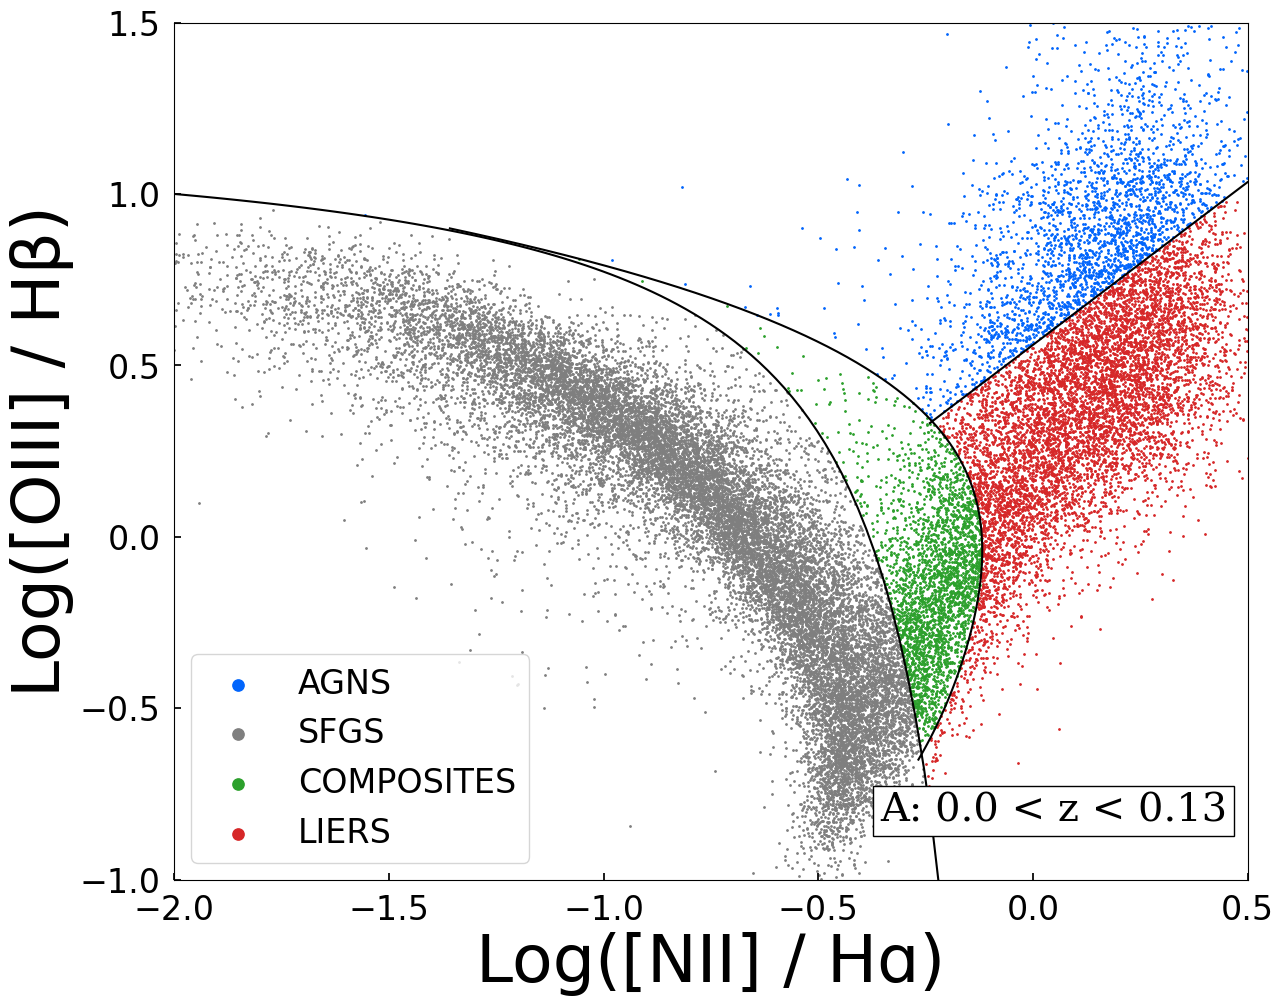

In [23]:
#Plots the BPT!!

plot_prettier(150, fontsize=24)

scale = 1
plt.rcParams.update({'xtick.major.size': 5*scale})
plt.rcParams.update({'xtick.major.width': 1.25*scale})
plt.rcParams.update({'xtick.minor.size': 2.5*scale})
plt.rcParams.update({'xtick.minor.width': 1.25*scale})
plt.rcParams.update({'ytick.direction':'in'})
plt.rcParams.update({'ytick.major.size': 5*scale})
plt.rcParams.update({'ytick.major.width': 1.25*scale})
plt.rcParams.update({'ytick.minor.size': 2.5*scale})
plt.rcParams.update({'ytick.minor.width': 1.25*scale})
binning = 15*3

pointsize = 18*scale
dotcolor = 'C1'




fig, axes = plt.subplot_mosaic("A",figsize=(11*scale, 8.5*scale))
fig.tight_layout(pad=-1.0)

#------------------------------------------------------------------------
axes["A"].scatter(plot_AGN['N2'],plot_AGN['R3'],label='AGNS',s=1,c=c_agn)
axes["A"].scatter(plot_SFG['N2'],plot_SFG['R3'],label='SFGS',s=1,c=c_SFG)
axes["A"].scatter(plot_composite['N2'],plot_composite['R3'],label='COMPOSITES',s=1,c=c_comp)
axes["A"].scatter(plot_LIER['N2'],plot_LIER['R3'],label='LIERS',s=1,c=c_LIER)
axes["A"].plot(bptline1x,bptline1y,c='k')
axes["A"].plot(bptline2x,bptline2y,c='k')
axes["A"].plot(bptline3x,bptline3y,c='k')
axes["A"].set_xlim(-2.0,0.5)
axes["A"].set_ylim(-1.0,1.5)

#------------------------------------------------------------------------------------------------------------------------------

axes["A"].legend(loc=1)
axes["A"].set_ylabel('Log([OIII] / Hβ)',fontsize=48)
axes["A"].set_xlabel('Log([NII] / Hɑ)',fontsize=48)
linelabels = [str(np.round(plotzmin,3))+' < z < '+str(np.round(plotzmax,3))]
for i, (label, ax) in enumerate(axes.items()):
    # Use Axes.annotate to put the label
    # - at the top left corner (axes fraction (0, 1)),
    # - offset half-a-fontsize right and half-a-fontsize down
    #   (offset fontsize (+0.5, -0.5)),
    # i.e. just inside the axes.
    ax.annotate(
        label+': '+linelabels[i],
        xy=(1, 0), xycoords='axes fraction',
        xytext=(-0.5, +1.25), textcoords='offset fontsize',
        fontsize='large', verticalalignment='bottom',horizontalalignment='right', fontfamily='serif',
        bbox=dict(facecolor='white', edgecolor='black', pad=5.0))
plt.subplots_adjust(wspace=0.07,hspace=0.05)

legend = plt.legend(loc=3)
for legobj in legend.legendHandles:
    legobj.set_sizes([66])
#plt.savefig('BPT_cat.pdf',bbox_inches='tight')
plt.show()
